In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure character display
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Define column names
cols = ['label'] + [f'I{i}' for i in range(1, 14)] + [f'C{i}' for i in range(1, 27)]

num_features = [f'I{i}' for i in range(1, 14)]  # Numerical features

# Load data (first 10,000 rows)
data = pd.read_csv('../../data/raw/train.txt', sep='\t', header=None, names=cols, nrows=10000)

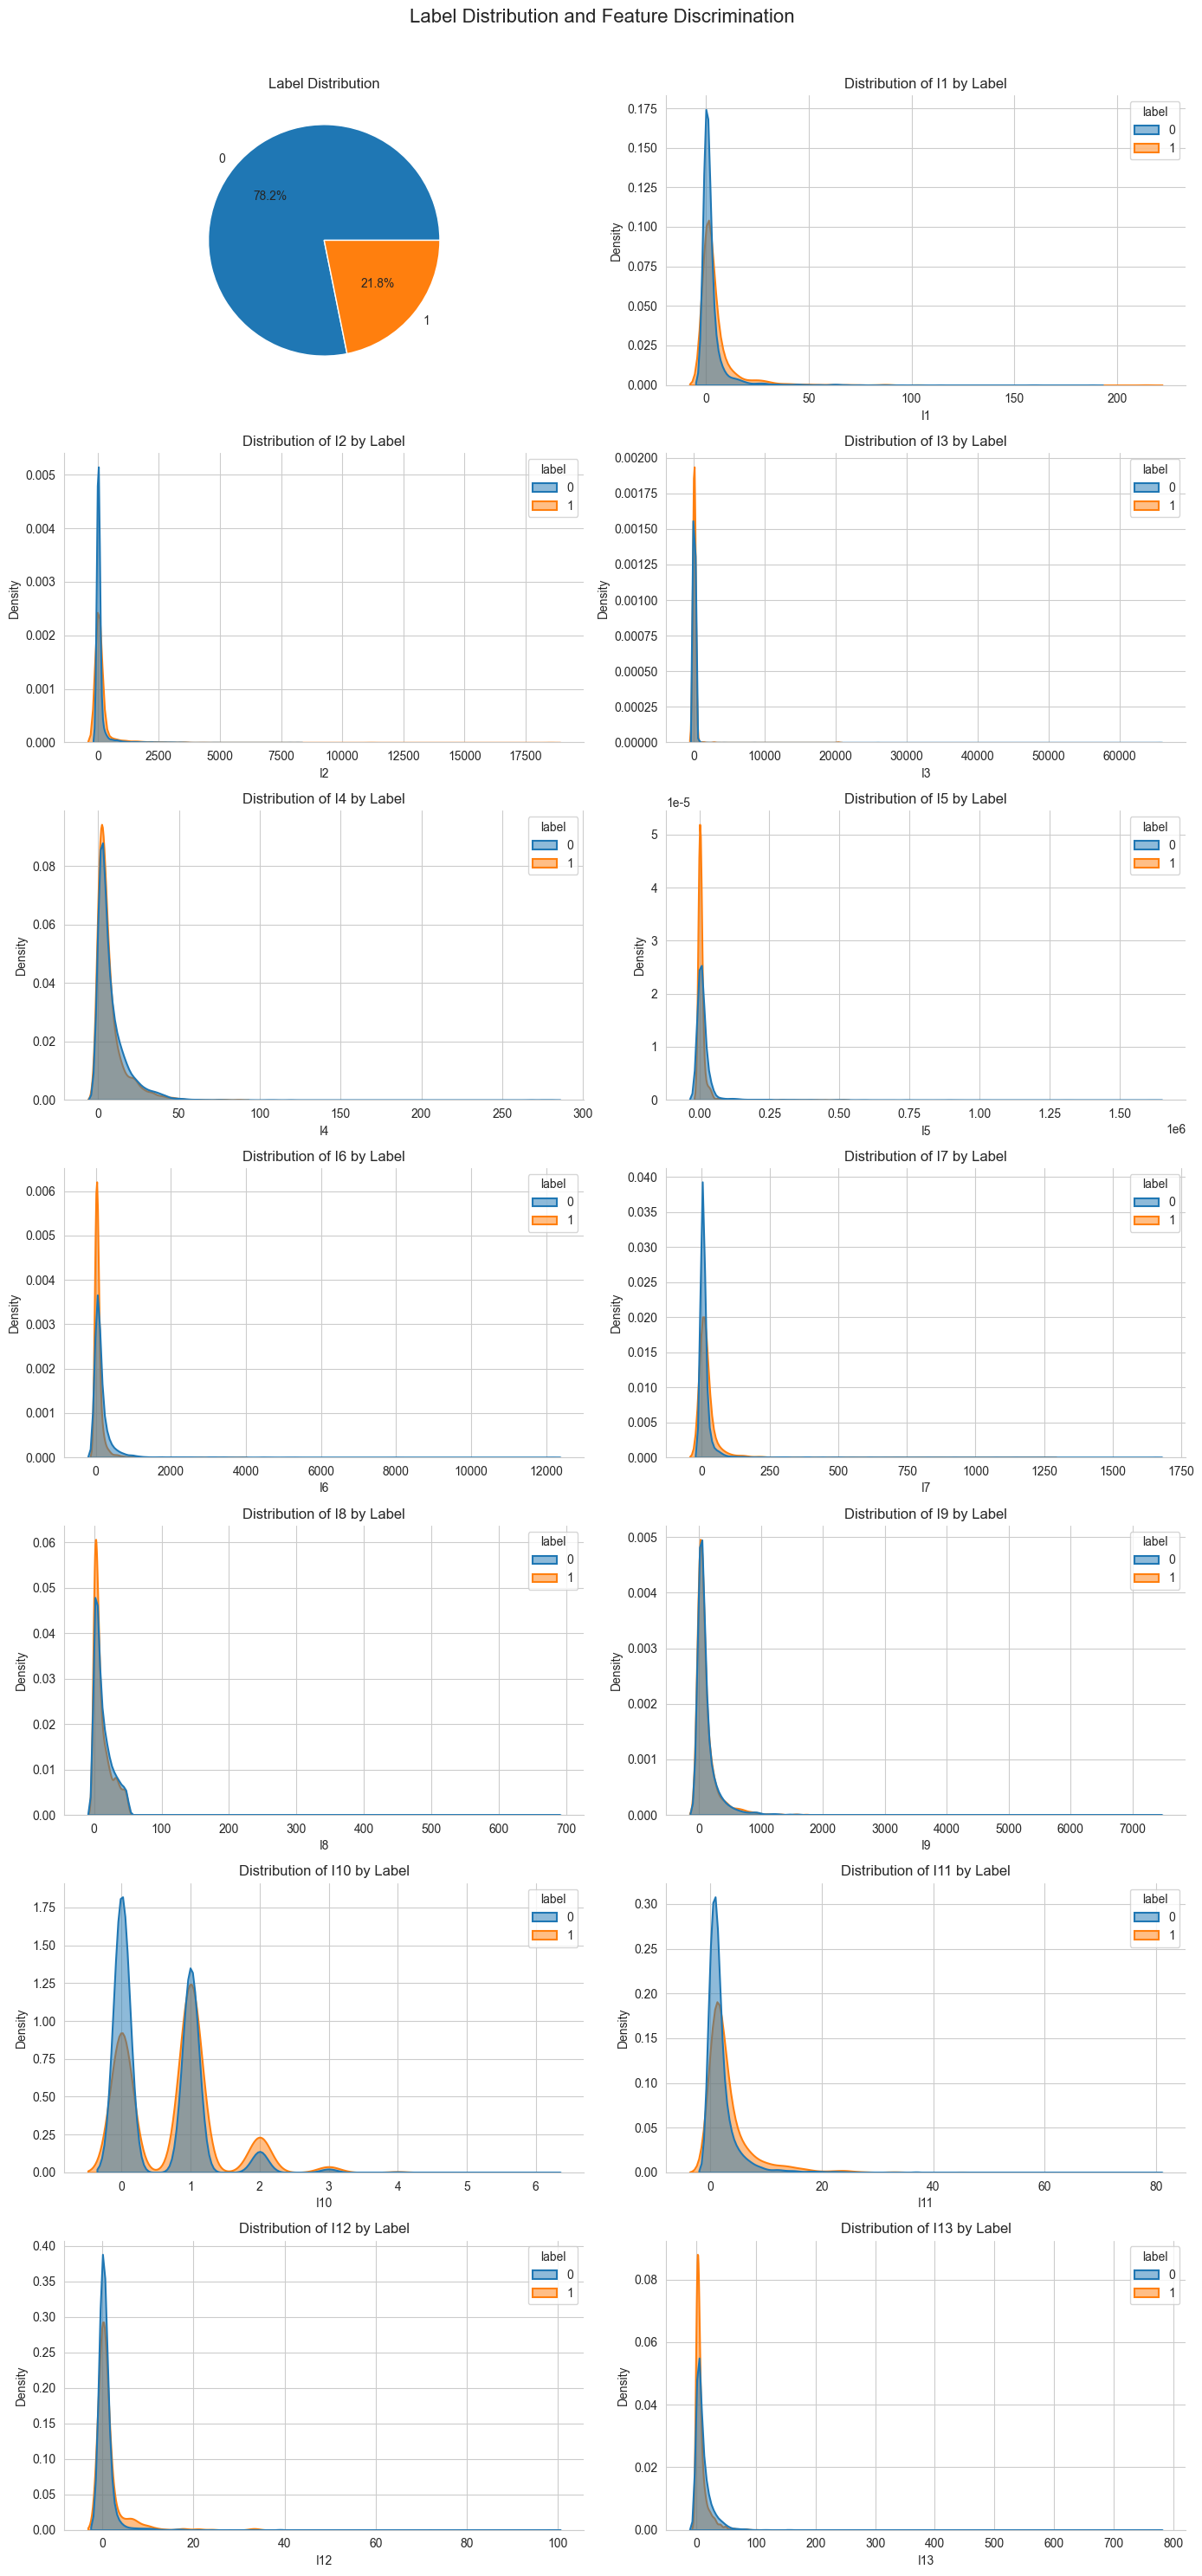

In [22]:
# Get all numerical feature column names (I1 to I13)
num_features = [f'I{i}' for i in range(1, 14)]

# Create figure object: 1 pie chart for label distribution + 13 kernel density plots for features
# Total 14 subplots arranged in 7 rows and 2 columns
fig, axes = plt.subplots(7, 2, figsize=(14, 30))
axes = axes.flatten()  # Convert axes to 1D array for easier indexing

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# First plot: Pie chart for label distribution
data['label'].value_counts().plot.pie(
    autopct='%.1f%%',
    ax=axes[0],
    wedgeprops=dict(edgecolor='w')  # Add white borders between pie segments
)
axes[0].set_title('Label Distribution')
axes[0].set_ylabel('')  # Remove y-label for cleaner pie chart presentation

# Plot kernel density estimation for each numerical feature
for i, feature in enumerate(num_features, 1):  # Start from index 1 since index 0 is for pie chart
    sns.kdeplot(
        data=data,
        x=feature,
        hue='label',
        ax=axes[i],
        fill=True,  # Fill area under the curve
        common_norm=False,  # Do not share normalization
        alpha=.5,  # Transparency level
        linewidth=1.5
    )
    axes[i].set_title(f'Distribution of {feature} by Label')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    # Remove top and right spines for cleaner look
    sns.despine(ax=axes[i], top=True, right=True)

# Set overall title for the entire figure
plt.suptitle('Label Distribution and Feature Discrimination', fontsize=16, y=0.99)

# Automatically adjust subplot layout to prevent label overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Reserve space for suptitle

# Display the plot in Jupyter Notebook
plt.show()